# ML3. Классификация мобильных телефонов

У вас есть датасет с параметрами мобильных телефонов. Переменная `price_range` отвечает за то, к какой категории относится телефон: 1 — дорогие, 0 — дешевые.

Ваша задача состоит в том, чтобы наиболее точно научиться классифицировать телефоны по этим двум категориям на основании других параметров.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('data/train_mobile.csv', sep=';')
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


## Задание 3.1. Отбор признаков

Для начала нам надо отобрать признаки, с помощью которых мы будем предсказывать категорию телефона.
Выберите пять признаков, у которых наибольшая взаимосвязь с целевой переменной (с помощью корреляции). 

<AxesSubplot:>

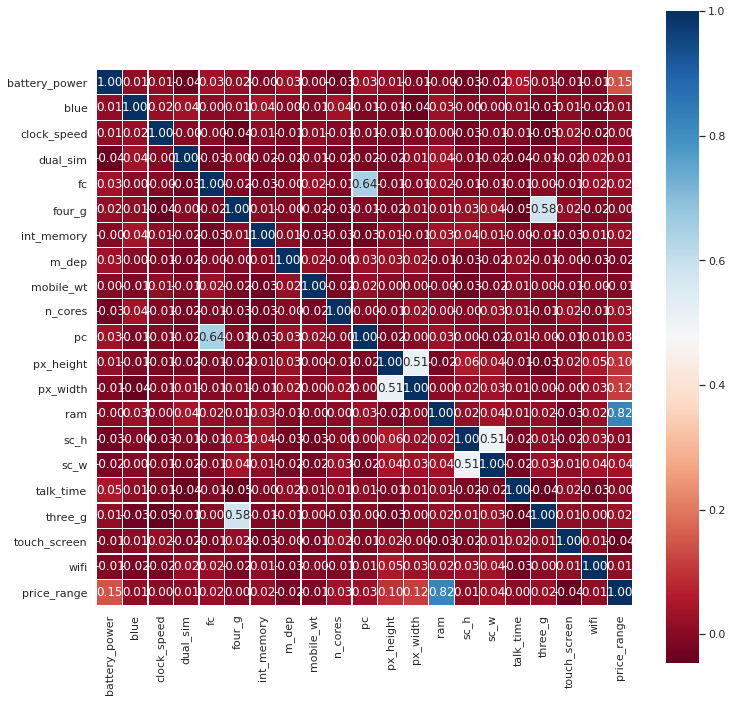

In [17]:
# sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))

sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', linewidths=0.1, cmap='RdBu')

In [28]:
for x in df.corr()['price_range'].abs().sort_values(ascending=False)[1:6].index:
    print(x)

ram
battery_power
px_width
px_height
touch_screen


## Задание 3.2. Выбор метрики

Теперь необходимо обучить алгоритм.  Для начала разбейте выборку на тестовую и обучающую, размер тестовой задайте `0.2`. Параметр `random_state=31`. В качестве модели возьмите логистическую регрессию. В качестве предикторов возьмите пять ранее отобранных признаков.

Рассчитайте метрику, которая покажет, какая доля телефонов, обозначенных классификатором как дорогие, действительно относится к этой категории. 

Что это за метрика?

In [31]:
x = df[['ram', 'battery_power', 'px_width', 'px_height', 'touch_screen']].values
y = df['price_range'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=31)
model = LogisticRegression()
model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

In [38]:
print(precision_score(y_test, y_predicted))

0.9859154929577465


In [39]:
# other metrics
print(recall_score(y_test, y_predicted))
print(f1_score(y_test, y_predicted))
print(accuracy_score(y_test, y_predicted))

0.9905660377358491
0.9882352941176472
0.9875
